# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

## Step 2: Download the Kaggle dataset using the kaggle python library

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
!pip install -U pip setuptools wheel
!pip install autogluon --no-cache-dir
# Without --no-cache_dir, smaller aws instances may have trouble installing

import numpy
print(numpy.__version__)

2.0.2


### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "maryamadibi"
kaggle_key = "1ea64e8b20324c1b0268303ee0c03486"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"maryamadibi": kaggle_username, "1ea64e8b20324c1b0268303ee0c03486": kaggle_key}))

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username": "maryamadibi", "key": "1ea64e8b20324c1b0268303ee0c03486"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 366MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

# Re-install autogluon to ensure compatibility with the downgraded numpy
!pip install autogluon --no-cache-dir

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-core 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-timeseries 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.3.1 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.23.0 r

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 162.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [9]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [10]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [11]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [12]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [13]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "best_quality"

In [15]:
predictor = TabularPredictor(label=label,
                             problem_type= 'regression',
                             eval_metric=eval_metric,
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                           train_data = train_data,
                                                                           time_limit=time_limit,
                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_145744"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.32 GB / 12.67 GB (89.3%)
Disk Space Avail:   66.88 GB / 107.72 GB (62.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=3655) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3870) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3923) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3923) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3923) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3923) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=4001) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=3923) [5000]	valid_set's rmse: 125.681


(_ray_fit pid=3923) 	Ran out of time, early stopping on iteration 6357. Best iteration is:
(_ray_fit pid=3923) 	[6023]	valid_set's rmse: 125.428


(_ray_fit pid=4001) [3000]	valid_set's rmse: 133.639 [repeated 3x across cluster]
(_ray_fit pid=4001) [6000]	valid_set's rmse: 132.628 [repeated 3x across cluster]


(_ray_fit pid=4001) 	Ran out of time, early stopping on iteration 6512. Best iteration is:
(_ray_fit pid=4001) 	[6504]	valid_set's rmse: 132.443


(_ray_fit pid=4131) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=4131) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=4131) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=4131) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=4209) [1000]	valid_set's rmse: 139.958


(_ray_fit pid=4131) 	Ran out of time, early stopping on iteration 6448. Best iteration is:
(_ray_fit pid=4131) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=4209) [4000]	valid_set's rmse: 138.084 [repeated 5x across cluster]


(_dystack pid=3453) 	-132.0004	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3453) 	99.36s	 = Training   runtime
(_dystack pid=3453) 	14.74s	 = Validation runtime
(_dystack pid=3453) Fitting model: WeightedEnsemble_L2 ... Training model for up to 137.41s of the 23.80s of remaining time.
(_dystack pid=3453) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=3453) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3453) 	0.02s	 = Training   runtime
(_dystack pid=3453) 	0.0s	 = Validation runtime
(_dystack pid=3453) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=3453) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 23.77s of the 23.73s of remaining time.
(_dystack pid=3453) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
(_ray_fit pid=4359) 	Ran out of time, early stopping on iteration 996. Best iteration is:
(_ray_fit p

(_ray_fit pid=4479) [1000]	valid_set's rmse: 77.9697 [repeated 2x across cluster]


(_ray_fit pid=4479) 	Ran out of time, early stopping on iteration 1407. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=4479) 	[1263]	valid_set's rmse: 77.7972 [repeated 2x across cluster]


(_ray_fit pid=4613) [1000]	valid_set's rmse: 76.5935 [repeated 2x across cluster]


(_ray_fit pid=4613) 	Ran out of time, early stopping on iteration 1426. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=4613) 	[1367]	valid_set's rmse: 76.3055 [repeated 2x across cluster]


(_ray_fit pid=4733) [1000]	valid_set's rmse: 73.023 [repeated 2x across cluster]


(_ray_fit pid=4777) 	Ran out of time, early stopping on iteration 1390. Best iteration is:
(_ray_fit pid=4777) 	[1375]	valid_set's rmse: 75.4081
(_dystack pid=3453) 	-74.3716	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3453) 	55.98s	 = Training   runtime
(_dystack pid=3453) 	3.81s	 = Validation runtime
(_dystack pid=3453) Fitting model: WeightedEnsemble_L3 ... Training model for up to 137.41s of the -37.44s of remaining time.
(_dystack pid=3453) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.952, 'KNeighborsDist_BAG_L1': 0.048}
(_dystack pid=3453) 	-74.329	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3453) 	0.03s	 = Training   runtime
(_dystack pid=3453) 	0.0s	 = Validation runtime
(_dystack pid=3453) AutoGluon training complete, total runtime = 175.06s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 65.2 rows/s (1210 batch size)
(_dystack pid=3453) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/A

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.036685  root_mean_squared_error      24.727830  366.299535                0.001049           0.058155            3       True         10
1         LightGBM_BAG_L2  -55.070718  root_mean_squared_error      18.209080  282.907540                0.365708          43.020413            2       True          9
2       LightGBMXT_BAG_L2  -60.897603  root_mean_squared_error      24.361073  323.220967                6.517701          83.333840            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.080471    0.043250                0.080471           0.043250            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.081570    0.082744         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-132.11298921252313),
  'WeightedEnsemble_L2': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L2': np.float64(-60.8976032

In [17]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

model   score_val              eval_metric  pred_time_val  \
0     WeightedEnsemble_L3  -55.036685  root_mean_squared_error      24.727830   
1         LightGBM_BAG_L2  -55.070718  root_mean_squared_error      18.209080   
2       LightGBMXT_BAG_L2  -60.897603  root_mean_squared_error      24.361073   
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.080471   
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.081570   
5   KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error       0.066943   
6  RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error       1.057817   
7         LightGBM_BAG_L1 -131.054162  root_mean_squared_error       1.776010   
8       LightGBMXT_BAG_L1 -131.460909  root_mean_squared_error      14.737715   
9         CatBoost_BAG_L1 -132.112989  root_mean_squared_error       0.124416   

     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  366.299535                0.001049           0.058155            3   
1  282.907540                0.365708          43.020413            2   
2  323.220967                6.517701          83.333840            2   
3    0.043250                0.080471           0.043250            1   
4    0.082744                0.001099           0.039495            2   
5    0.050671                0.066943           0.050671            1   
6   23.016423                1.057817          23.016423            1   
7   50.661716                1.776010          50.661716            1   
8  100.822617               14.737715         100.822617            1   
9   65.292451                0.124416          65.292451            1   

   can_infer  fit_order  
0       True         10  
1       True          9  
2       True          8  
3       True          2  
4       True          7  
5       True          1  
6       True          5  
7       True          4  
8       True          3  
9       True          6

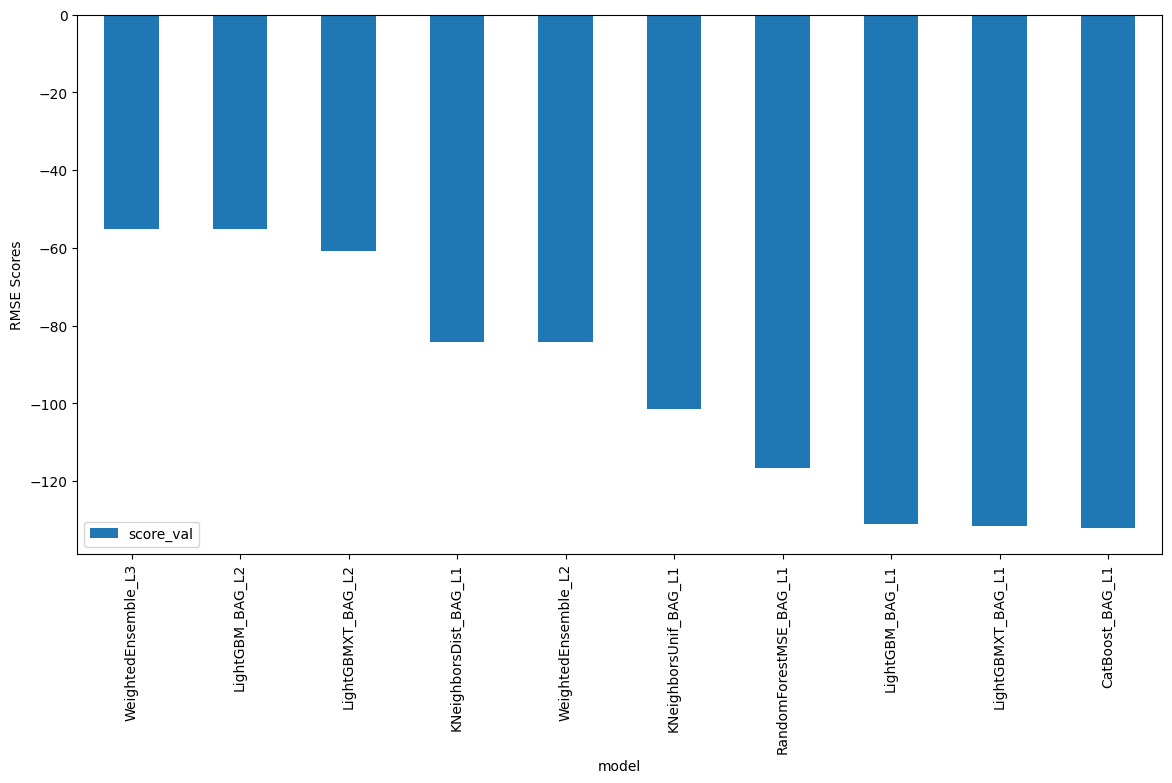

In [18]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### Create predictions from test dataset

In [19]:
predictions = predictor.predict(test)
predictions.head()

0    36.649933
1    45.065296
2    49.088058
3    53.685638
4    54.562508
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.388023
std        89.486267
min        -2.897204
25%        16.250469
50%        63.718327
75%       171.141769
max       366.249054
Name: count, dtype: float64

In [21]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6491
Total negative prediction values : 2


In [22]:
# Set them to zero
predictions[predictions<0] = 0

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")

No. of negative predictions: 0


### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 503kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-08 15:14:18.873000  first raw submission               SubmissionStatus.COMPLETE  1.83385      1.83385       
submission_new_hpo.csv       2025-06-07 20:01:07.510000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.84378      1.84378       
submission_new_features.csv  2025-06-07 19:45:55.210000  new features                       SubmissionStatus.COMPLETE  0.48649      0.48649       
submission.csv               2025-06-07 19:22:35.440000  first raw submission               SubmissionStatus.COMPLETE  1.84378      1.84378       


#### Initial score of 1.83385

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

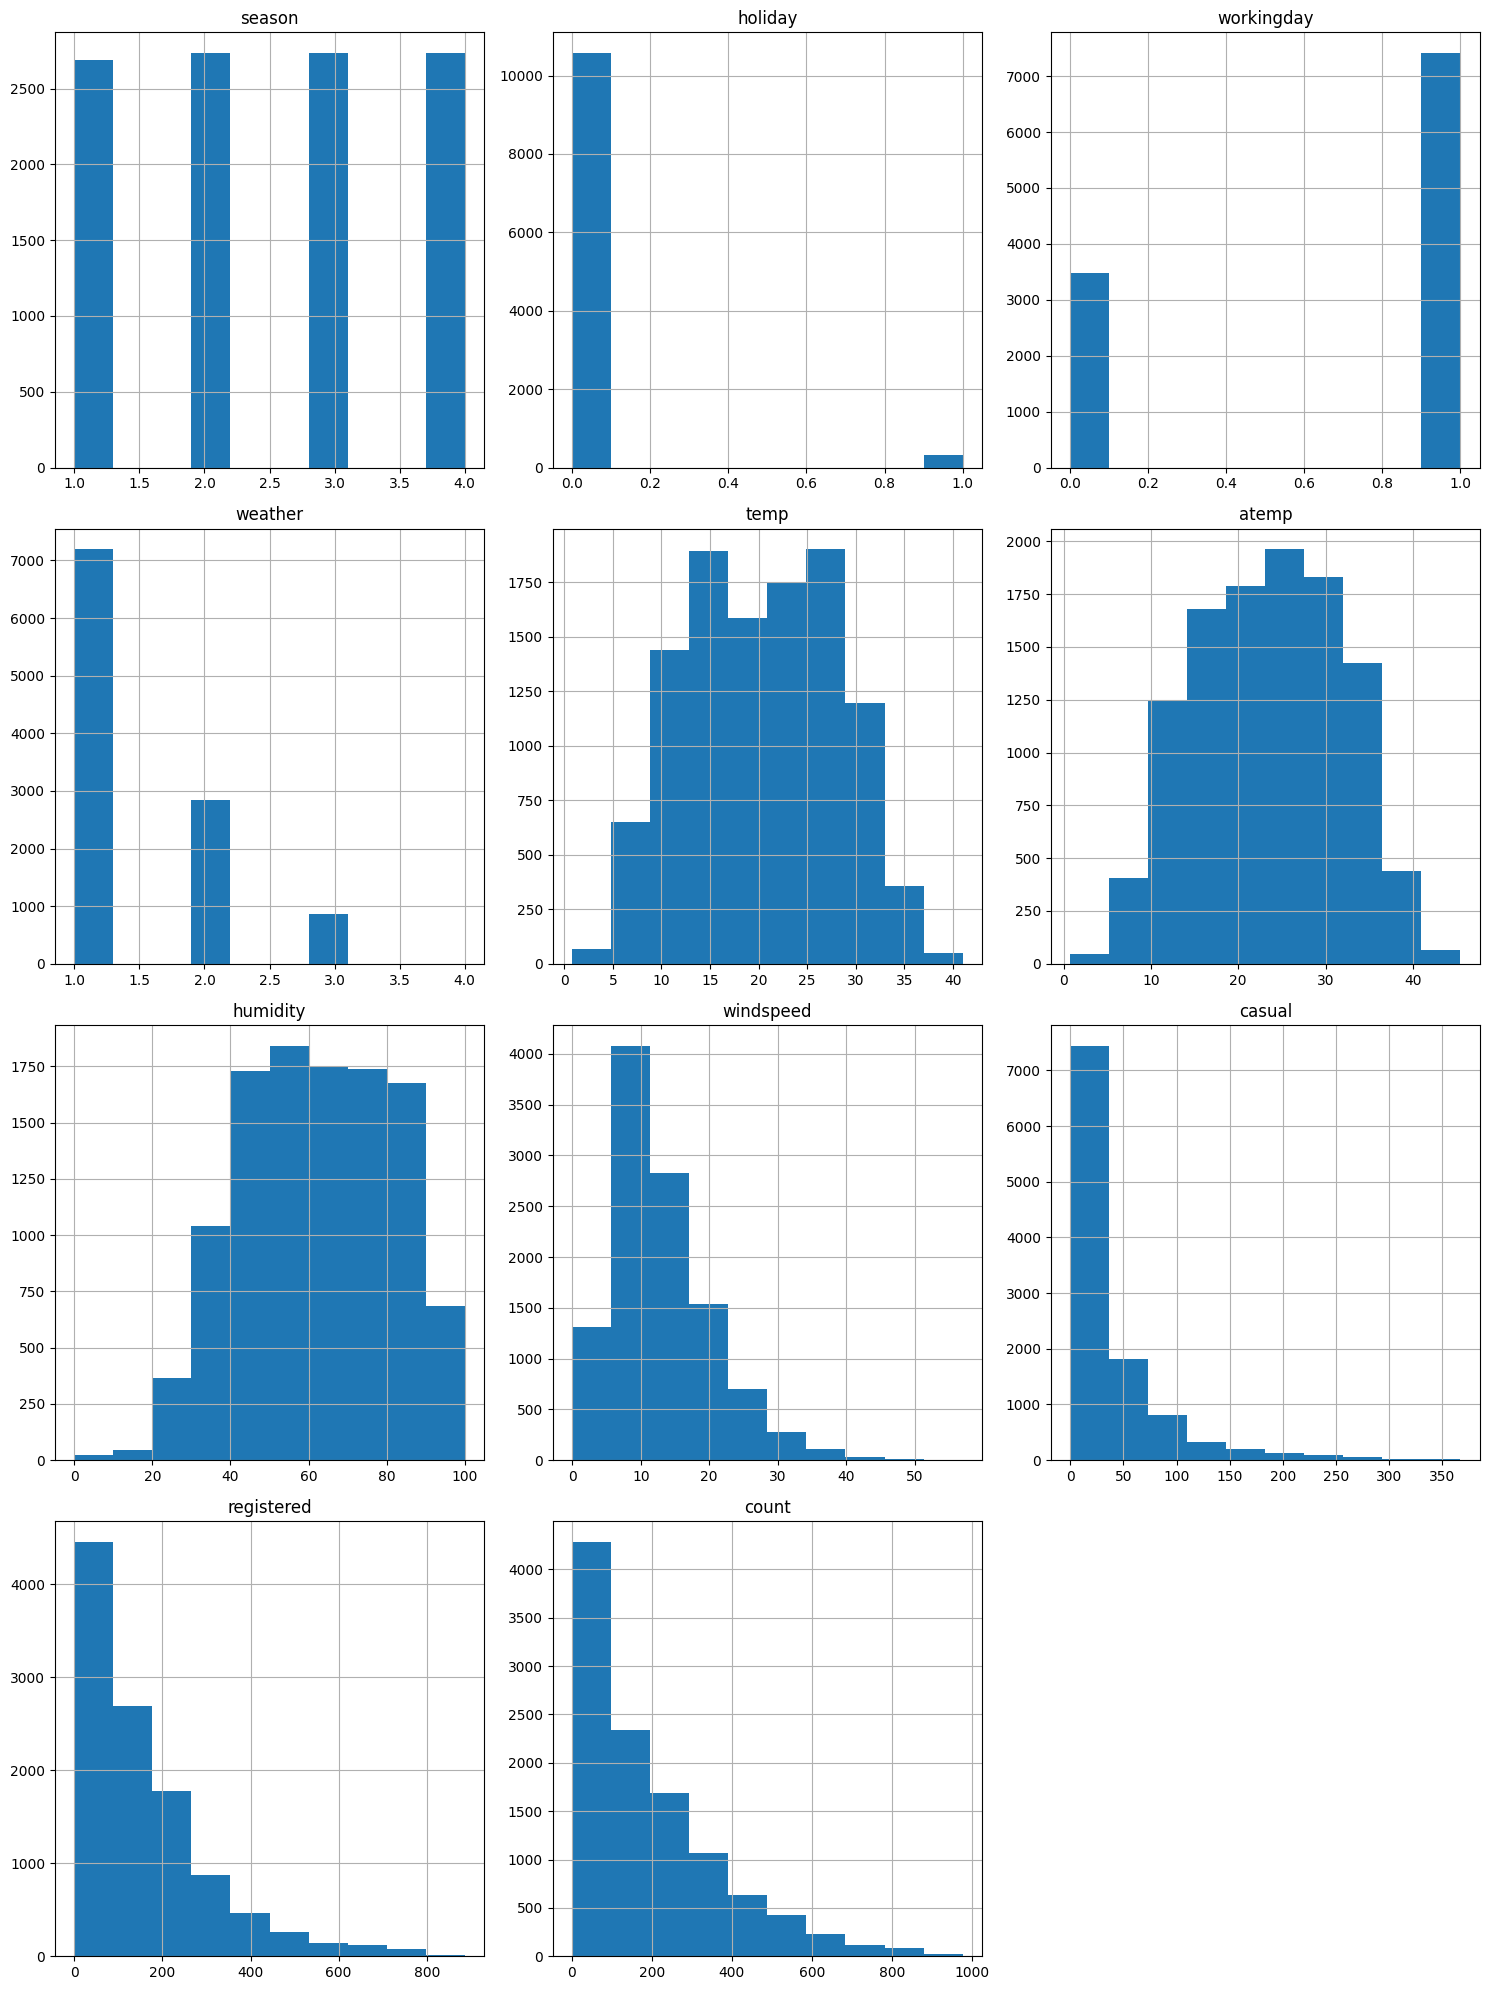

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))
plt.tight_layout()
plt.show()

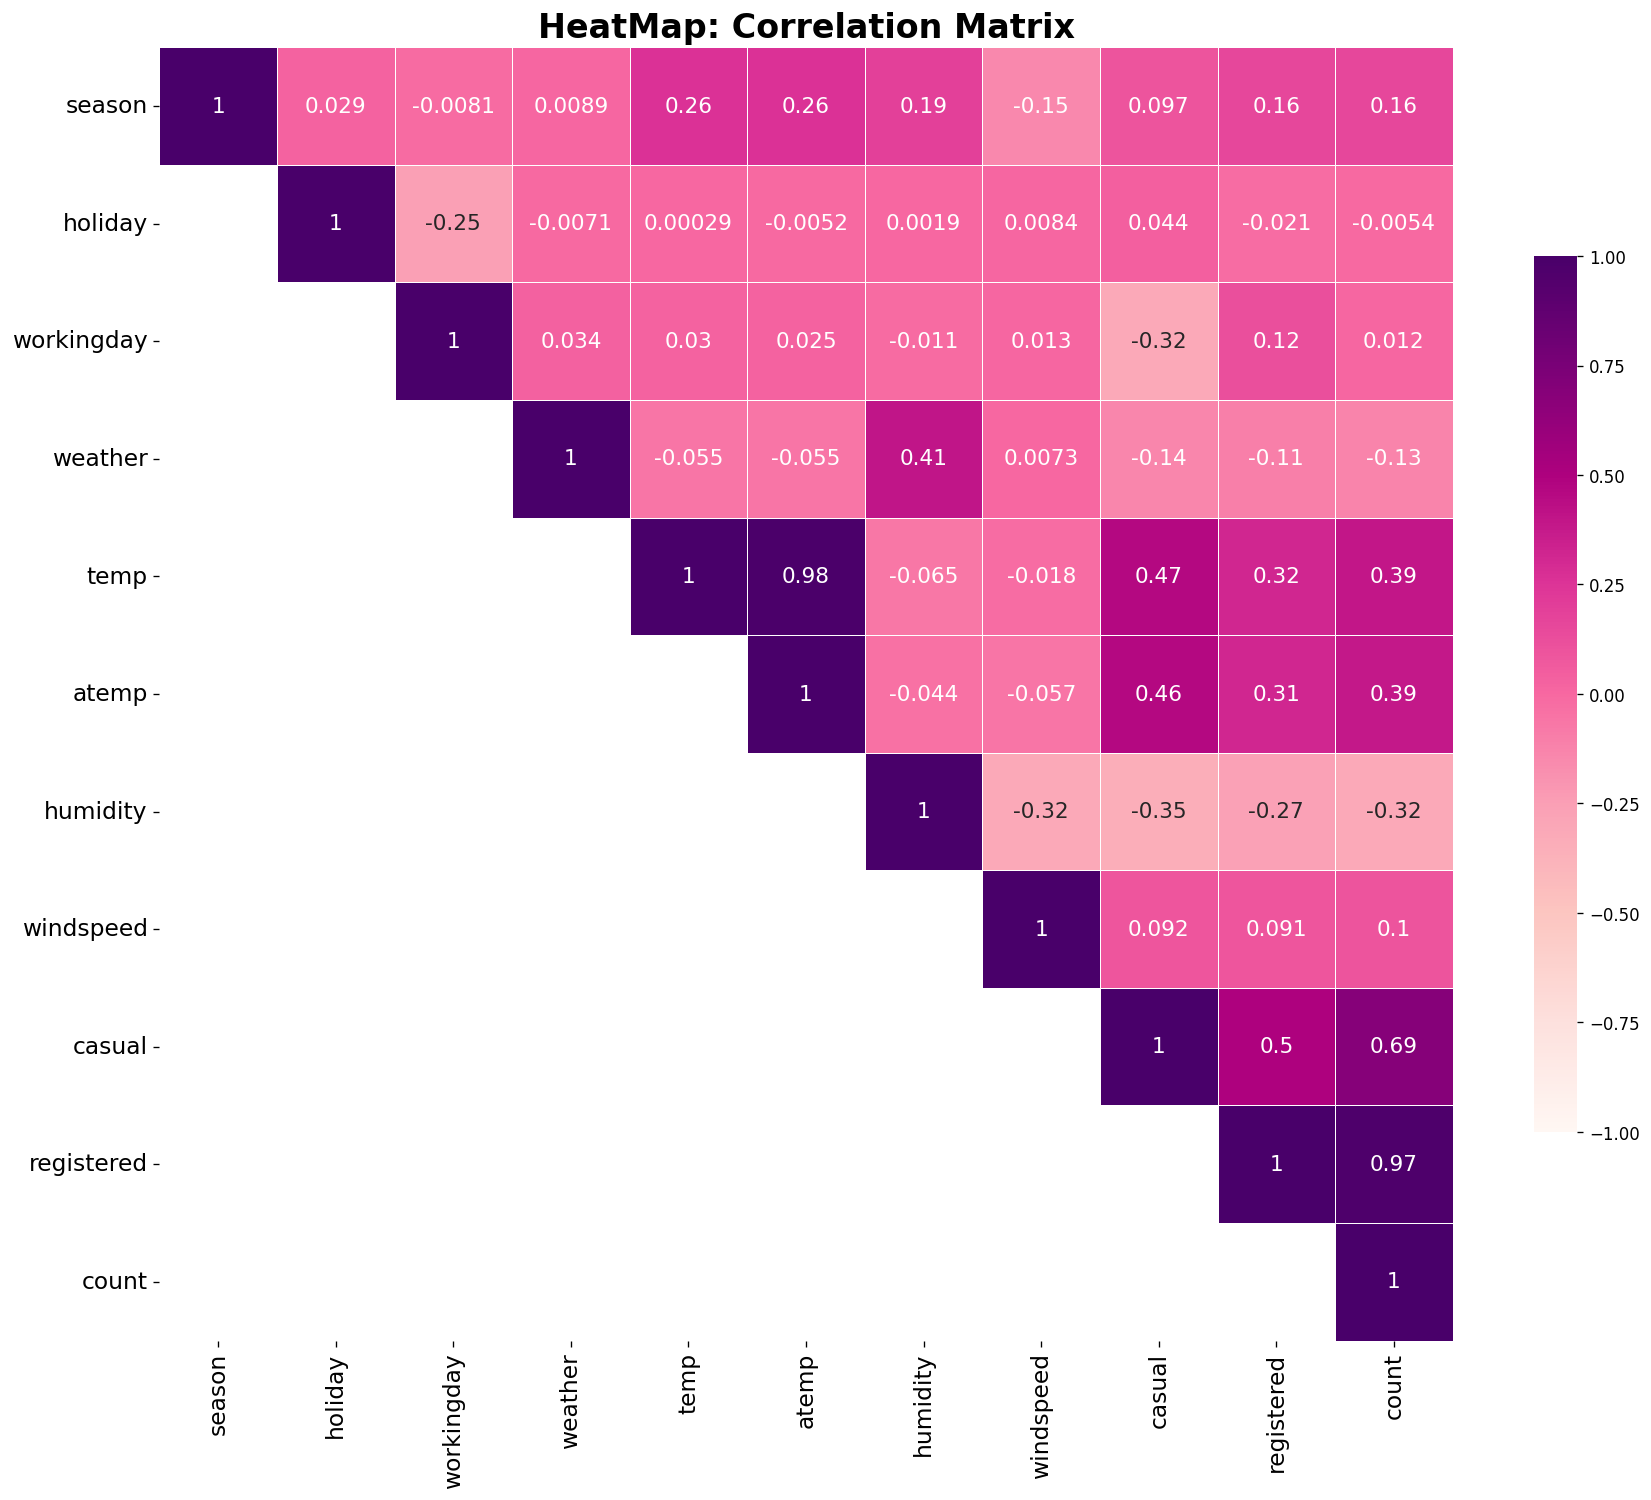

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns to avoid string/datetime errors
corr_data = train.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Create a mask to eliminate redundant lower triangle
corr_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 15), dpi=120)
sns.heatmap(
    corr_matrix,
    cmap='RdPu',
    cbar_kws={"shrink": .5},
    vmin=-1, vmax=1, center=0,
    square=True,
    mask=~corr_mask,  # only upper triangle
    annot=True,
    linewidths=0.5,
    annot_kws={"size": 13}
)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [29]:
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [30]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4

In [31]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)
test.head()

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   year  month  day  hour  
0  2011      1    3     0  
1  2011      1    3     1  
2  2011      1    3     2  
3  2011      1    3     3  
4  2011      1    3     4

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [33]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [34]:
# View are new feature
train.head()

season  holiday  workingday weather  temp   atemp  humidity  windspeed  \
0      1        0           0       1  9.84  14.395        81        0.0   
1      1        0           0       1  9.02  13.635        80        0.0   
2      1        0           0       1  9.02  13.635        80        0.0   
3      1        0           0       1  9.84  14.395        75        0.0   
4      1        0           0       1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4

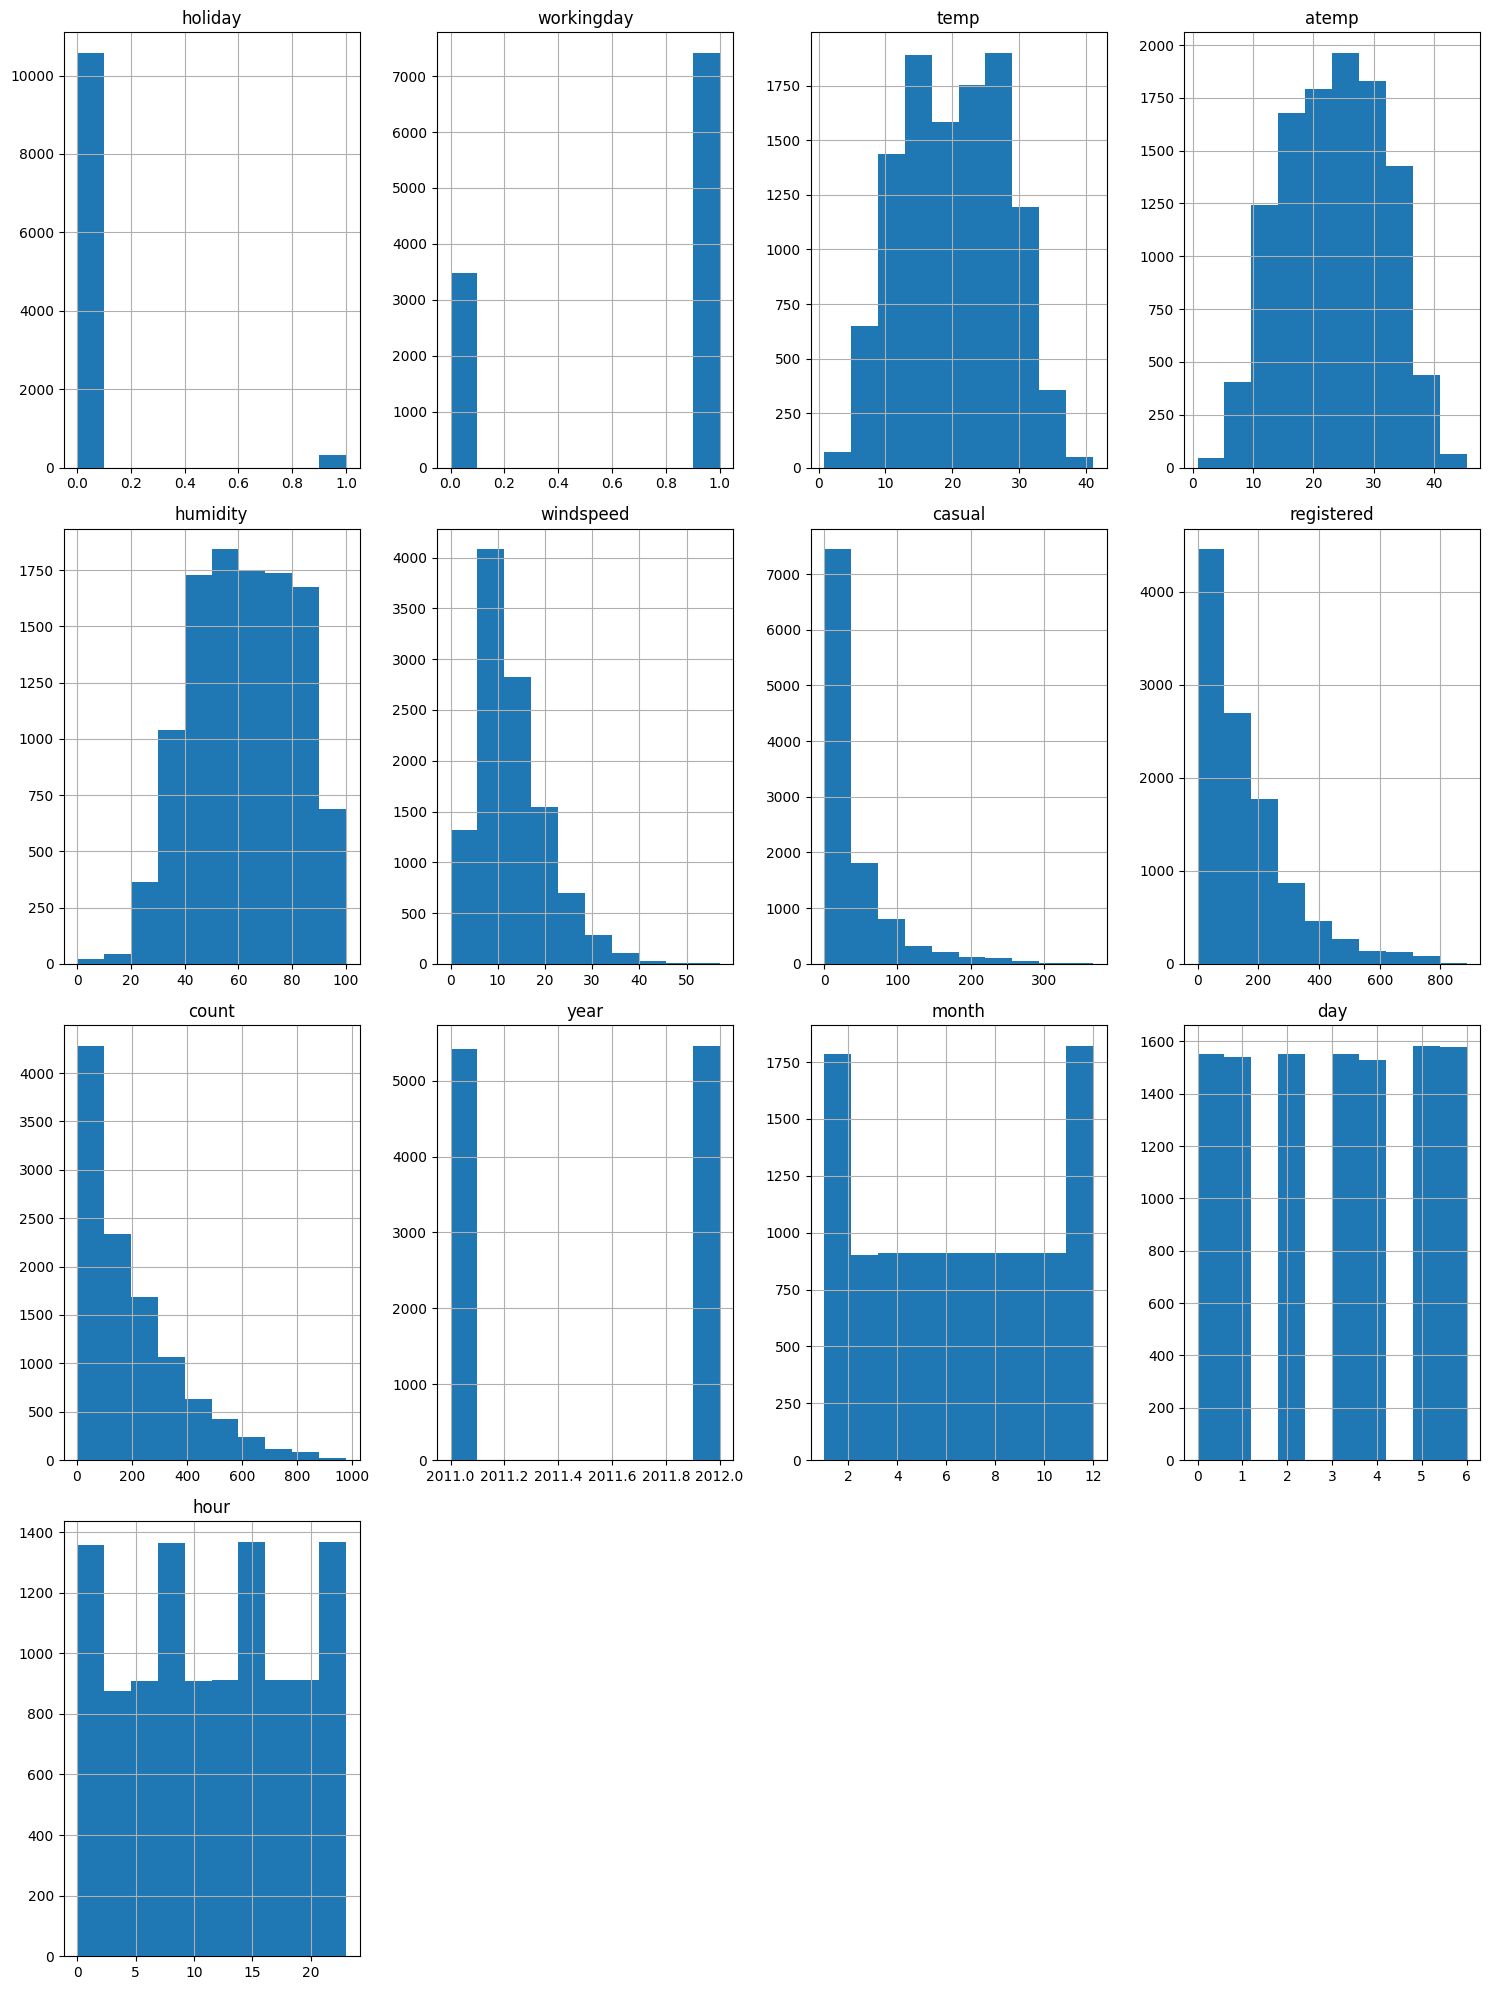

In [35]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))
plt.tight_layout()
plt.show()

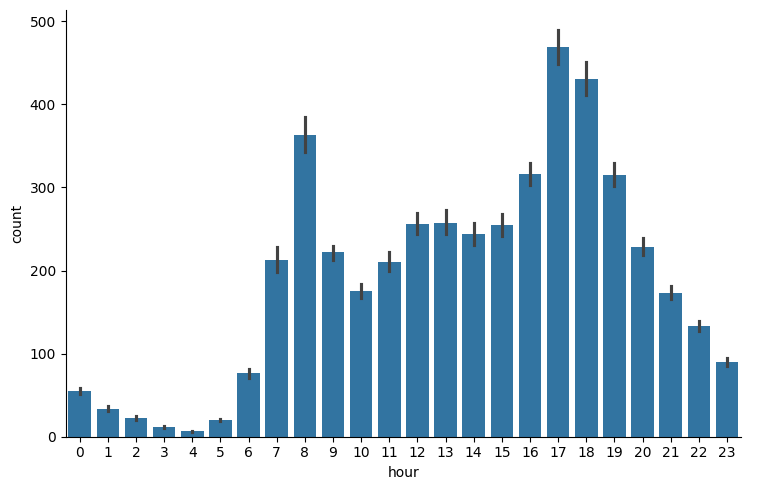

In [36]:
#Variation in target variable count with respect to new features derived from datetime feature
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

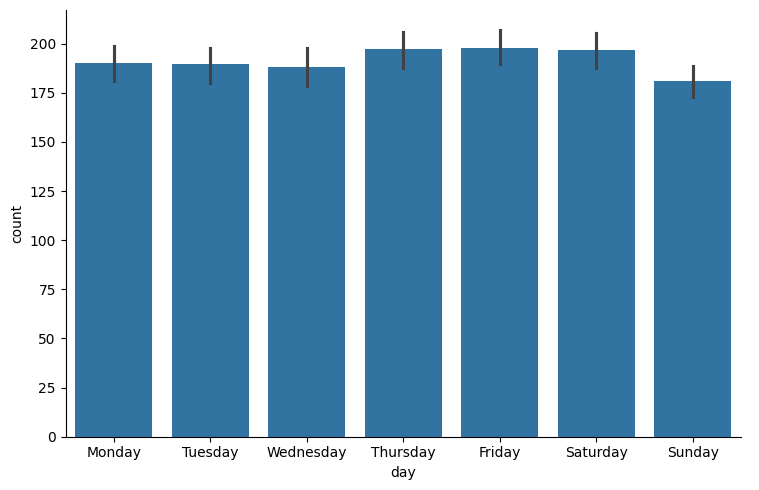

In [37]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

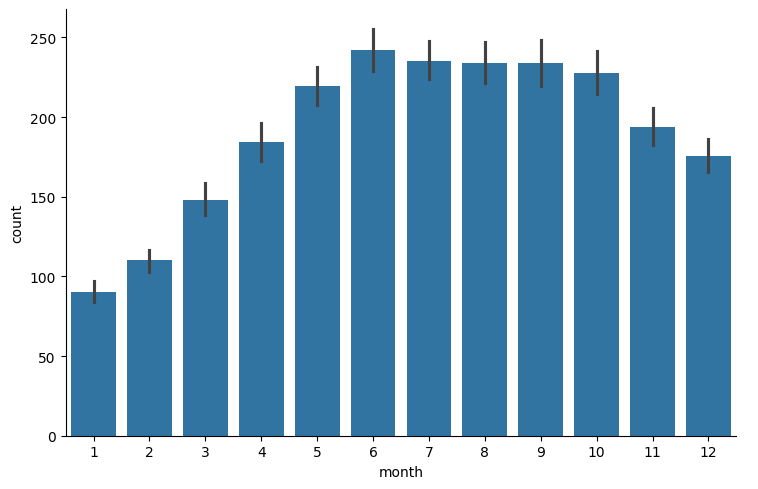

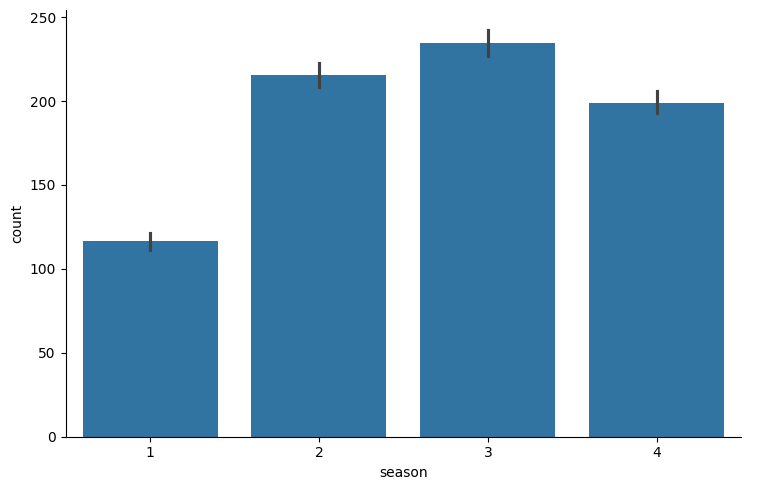

In [38]:
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

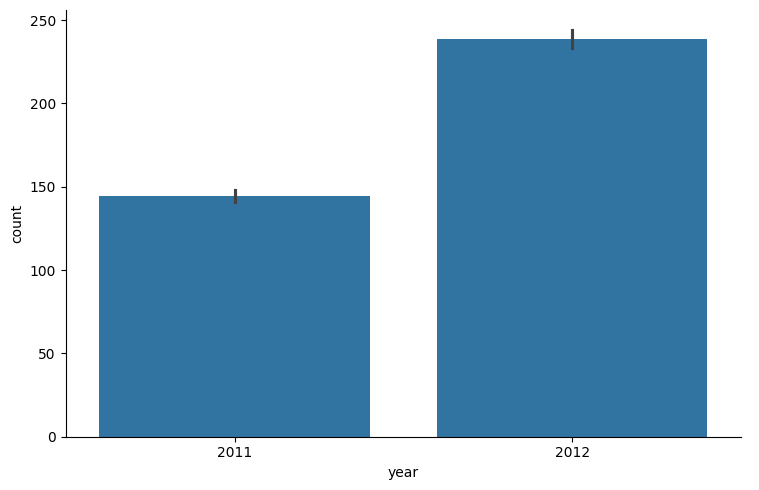

In [39]:
sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

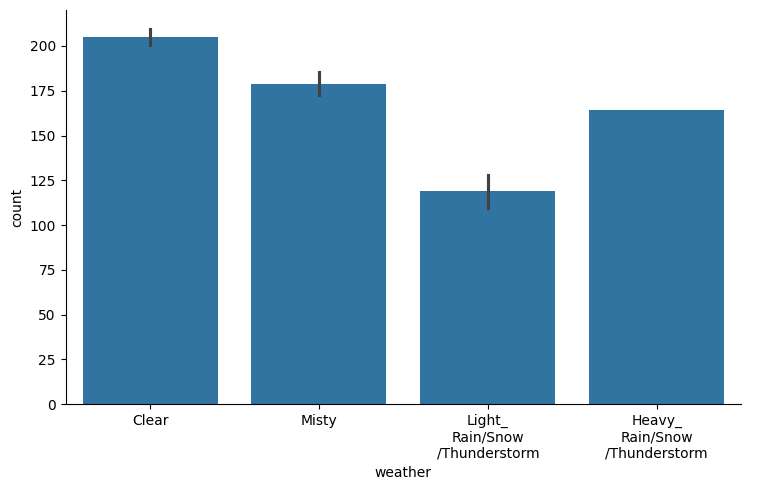

In [40]:
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty",
                                     "Light_\nRain/Snow\n/Thunderstorm",
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

In [41]:
#creating a new feature 'day type' in train data
# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

season  holiday  workingday weather  temp   atemp  humidity  windspeed  \
0      1        0           0       1  9.84  14.395        81        0.0   
1      1        0           0       1  9.02  13.635        80        0.0   
2      1        0           0       1  9.02  13.635        80        0.0   
3      1        0           0       1  9.84  14.395        75        0.0   
4      1        0           0       1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour day_type  
0       3          13     16  2011      1    5     0  weekend  
1       8          32     40  2011      1    5     1  weekend  
2       5          27     32  2011      1    5     2  weekend  
3       3          10     13  2011      1    5     3  weekend  
4       0           1      1  2011      1    5     4  weekend

In [42]:
# Statistics of all features within the trian data
train.describe()

holiday    workingday         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.028569      0.680875     20.23086     23.655084     61.886460   
std        0.166599      0.466159      7.79159      8.474601     19.245033   
min        0.000000      0.000000      0.82000      0.760000      0.000000   
25%        0.000000      0.000000     13.94000     16.665000     47.000000   
50%        0.000000      1.000000     20.50000     24.240000     62.000000   
75%        0.000000      1.000000     26.24000     31.060000     77.000000   
max        1.000000      1.000000     41.00000     45.455000    100.000000   

          windspeed        casual    registered         count          year  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      12.799395     36.021955    155.552177    191.574132   2011.501929   
std        8.164537     49.960477    151.039033    181.144454      0.500019   
min        0.000000      0.000000      0.000000      1.000000   2011.000000   
25%        7.001500      4.000000     36.000000     42.000000   2011.000000   
50%       12.998000     17.000000    118.000000    145.000000   2012.000000   
75%       16.997900     49.000000    222.000000    284.000000   2012.000000   
max       56.996900    367.000000    886.000000    977.000000   2012.000000   

              month           day          hour  
count  10886.000000  10886.000000  10886.000000  
mean       6.521495      3.013963     11.541613  
std        3.444373      2.004585      6.915838  
min        1.000000      0.000000      0.000000  
25%        4.000000      1.000000      6.000000  
50%        7.000000      3.000000     12.000000  
75%       10.000000      5.000000     18.000000  
max       12.000000      6.000000     23.000000

In [43]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  year        10886 non-null  int32   
 11  month       10886 non-null  int32   
 12  day         10886 non-null  int32   
 13  hour        10886 non-null  int32   
 14  day_type    10886 non-null  category
dtypes: category(3), float64(2), int32(4), int64(6)
memory usage: 883.0 KB


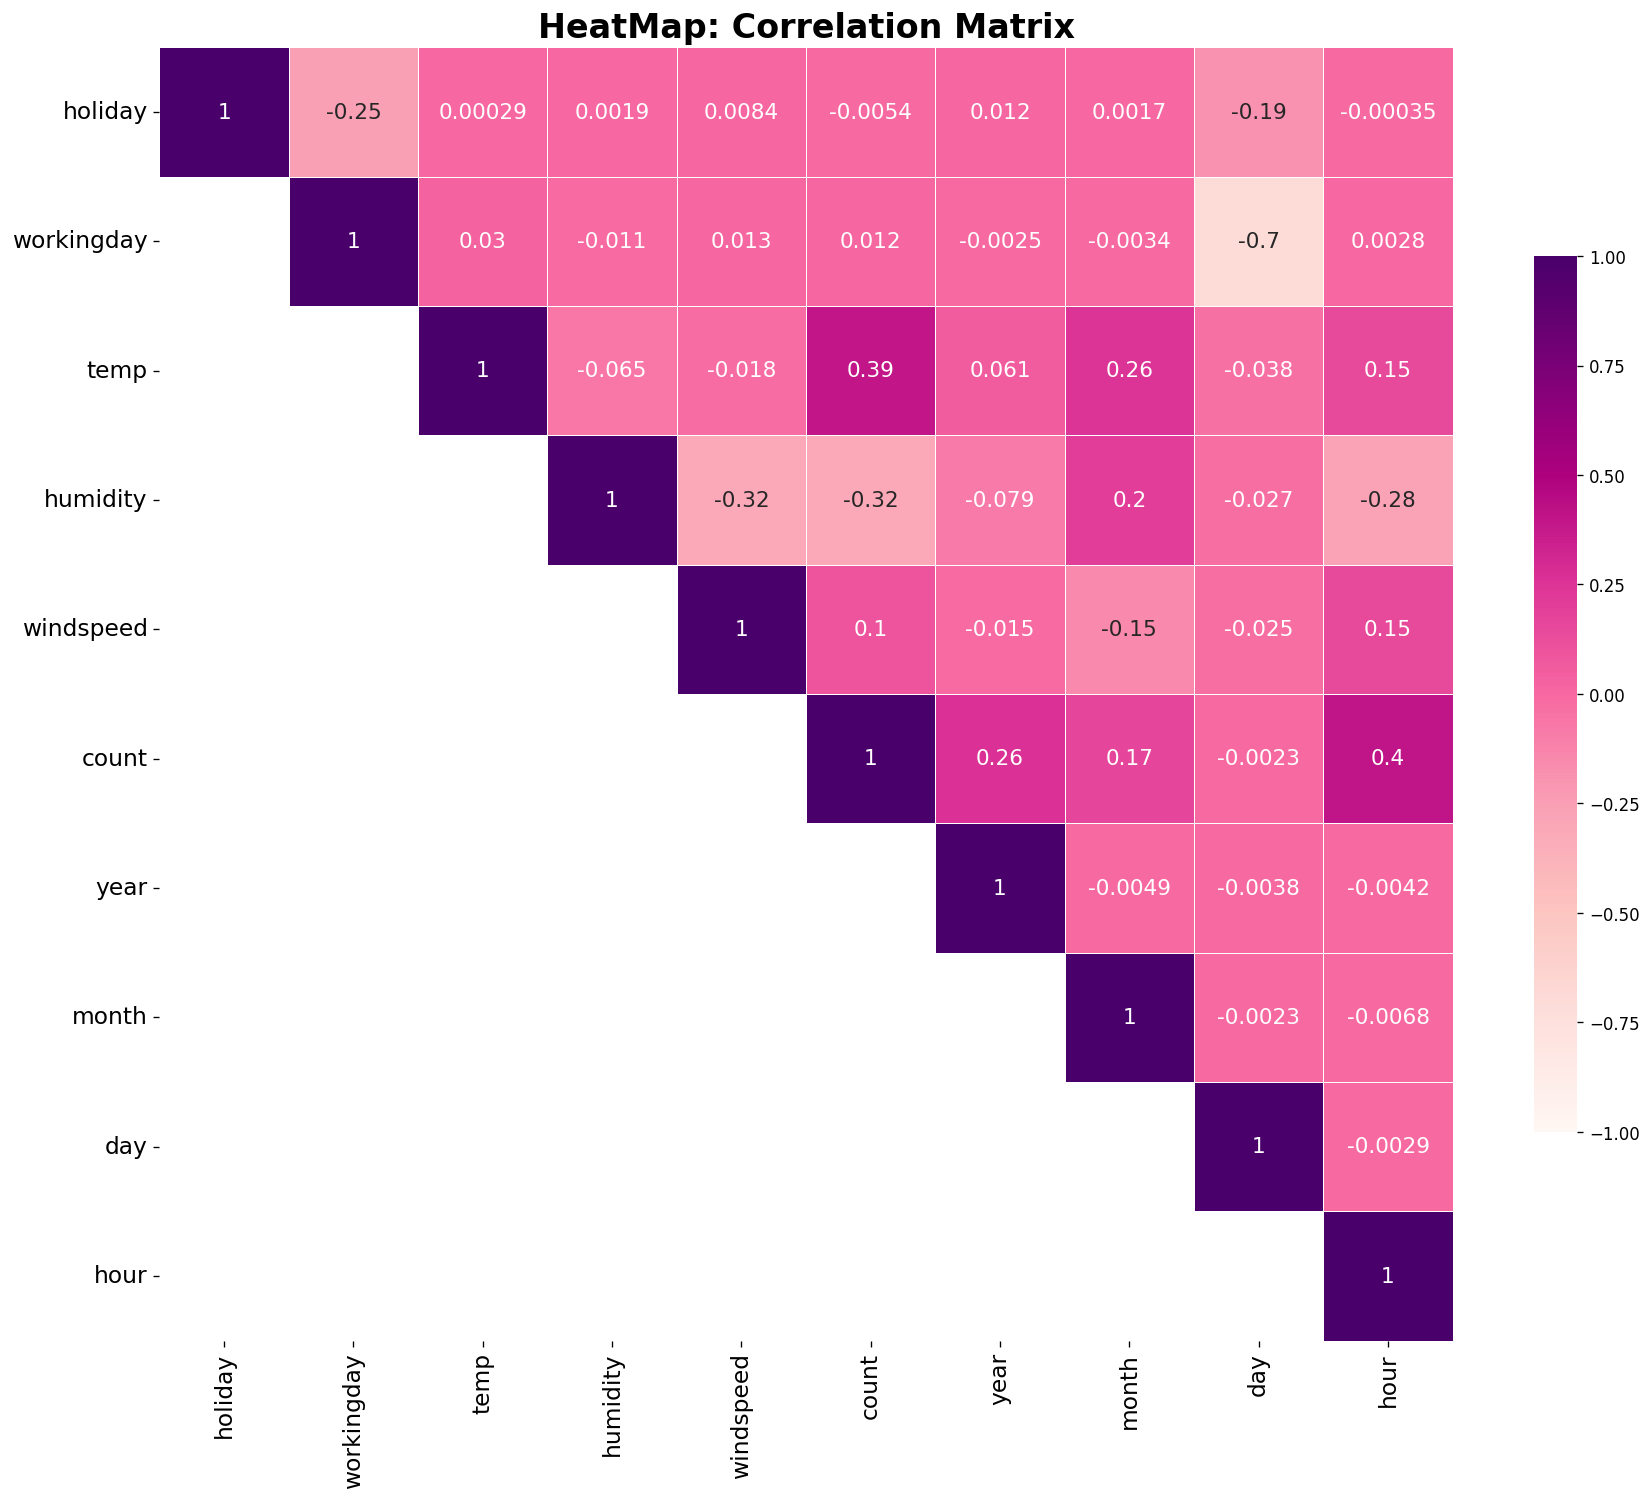

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Exclude unwanted columns and select only numeric features
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]
corr_data = train[feature_numeric].select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Create a mask to hide the lower triangle of the correlation matrix
corr_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 15), dpi=120)
sns.heatmap(
    corr_matrix,
    cmap='RdPu',
    cbar_kws={"shrink": .5},
    vmin=-1, vmax=1, center=0,
    square=True,
    mask=~corr_mask,
    annot=True,
    linewidths=0.5,
    annot_kws={"size": 13}
)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600
presets = "best_quality"

In [47]:
predictor_new_features = TabularPredictor(label=label,
                                          problem_type= 'regression',
                                          eval_metric=eval_metric,
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_151721"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.47 GB / 12.67 GB (82.6%)
Disk Space Avail:   66.42 GB / 107.72 GB (61.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [48]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -34.382987  root_mean_squared_error      29.272139  300.673637                0.001086           0.044087            3       True         10
1     WeightedEnsemble_L2  -34.454222  root_mean_squared_error      28.561679  215.600448                0.001022           0.050466            2       True          7
2         LightGBM_BAG_L2  -34.955320  root_mean_squared_error      29.271053  300.629550                0.222503          44.463706            2       True          9
3       LightGBMXT_BAG_L2  -35.492184  root_mean_squared_error      29.710917  313.470848                0.662367          57.305005            2       True          8
4         LightGBM_BAG_L1  -35.780355  root_mean_squared_error       5.844445   69.674926         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-113.26164315463612),
  'KNeighborsDist_BAG_L1': np.float64(-109.84517207130654),
  'LightGBMXT_BAG_L1': np.float64(-36.7080198842608),
  'LightGBM_BAG_L1': np.float64(-35.78035548163389),
  'RandomForestMSE_BAG_L1': np.float64(-39.71723944004303),
  'CatBoost_BAG_L1': np.float64(-50.03022116318541),
  'WeightedEnsemble_L2': np.float64(-34.45422219021619),
  'LightGBMXT_BAG_L2': np.float64(-35.492183749

In [49]:
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

model   score_val              eval_metric  pred_time_val  \
0     WeightedEnsemble_L3  -34.382987  root_mean_squared_error      29.272139   
1     WeightedEnsemble_L2  -34.454222  root_mean_squared_error      28.561679   
2         LightGBM_BAG_L2  -34.955320  root_mean_squared_error      29.271053   
3       LightGBMXT_BAG_L2  -35.492184  root_mean_squared_error      29.710917   
4         LightGBM_BAG_L1  -35.780355  root_mean_squared_error       5.844445   
5       LightGBMXT_BAG_L1  -36.708020  root_mean_squared_error      21.921029   
6  RandomForestMSE_BAG_L1  -39.717239  root_mean_squared_error       0.795183   
7         CatBoost_BAG_L1  -50.030221  root_mean_squared_error       0.125021   
8   KNeighborsDist_BAG_L1 -109.845172  root_mean_squared_error       0.180400   
9   KNeighborsUnif_BAG_L1 -113.261643  root_mean_squared_error       0.182473   

     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  300.673637                0.001086           0.044087            3   
1  215.600448                0.001022           0.050466            2   
2  300.629550                0.222503          44.463706            2   
3  313.470848                0.662367          57.305005            2   
4   69.674926                5.844445          69.674926            1   
5  127.879888               21.921029         127.879888            1   
6   17.995169                0.795183          17.995169            1   
7   40.520690                0.125021          40.520690            1   
8    0.047755                0.180400           0.047755            1   
9    0.047416                0.182473           0.047416            1   

   can_infer  fit_order  
0       True         10  
1       True          7  
2       True          9  
3       True          8  
4       True          4  
5       True          3  
6       True          5  
7       True          6  
8       True          2  
9       True          1

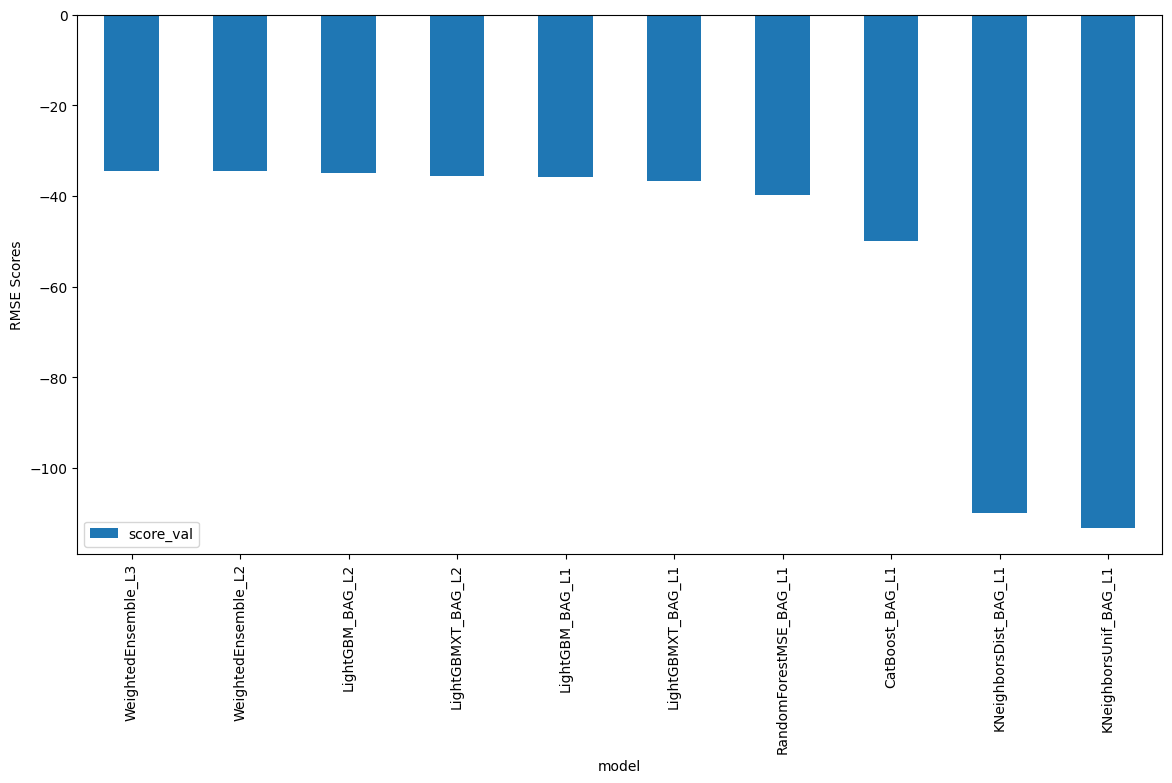

In [50]:
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [51]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    14.551422
1     5.531982
2     4.497101
3     3.699501
4     3.601942
Name: count, dtype: float32

In [52]:
predictions_new_features.describe()

count    6493.000000
mean      190.364273
std       174.307327
min       -12.707417
25%        45.861504
50%       148.932312
75%       282.315796
max       917.735352
Name: count, dtype: float64

In [53]:
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6463
Total negative prediction values : 30


In [54]:
predictions_new_features[predictions_new_features<0] = 0    #

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [55]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [56]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 530kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-08 15:31:37.713000  new features                       SubmissionStatus.COMPLETE  0.48747      0.48747       
submission.csv               2025-06-08 15:14:18.873000  first raw submission               SubmissionStatus.COMPLETE  1.83385      1.83385       
submission_new_hpo.csv       2025-06-07 20:01:07.510000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.84378      1.84378       
submission_new_features.csv  2025-06-07 19:45:55.210000  new features                       SubmissionStatus.COMPLETE  0.48649      0.48649       


#### New Score of 0.48747

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [59]:
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "optimize_for_deployment"

In [60]:
from autogluon.tabular import TabularPredictor

# General settings
label = 'count'
ignored_columns = ['casual', 'registered']
time_limit = 600  # Maximum training time in seconds (10 minutes)
presets = 'optimize_for_deployment'

# Define full model configurations and hyperparameters (no shorthand strings)
hyperparameters = {
    'GBM': [
        {
            'extra_trees': True,
            'num_boost_round': 100,
            'num_leaves': 36,
            'ag_args': {'name_suffix': 'XT'}
        },
        {},  # Default GBM settings
        {
            'learning_rate': 0.03,
            'num_leaves': 128,
            'feature_fraction': 0.9,
            'min_data_in_leaf': 3,
            'ag_args': {'name_suffix': 'Large', 'priority': 0}
        }
    ],
    'NN_TORCH': {
        'num_epochs': 5,
        'learning_rate': [1e-4, 5e-4, 1e-3],
        'activation': ['relu', 'softrelu', 'tanh'],
        'dropout_prob': [0.0, 0.1, 0.3]
    }
}

# Hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 20,
    'scheduler': 'local',
    'searcher': 'auto'
}

# Train the model
predictor_new_hpo = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)

# Show leaderboard
predictor_new_hpo.leaderboard(silent=True)


No path specified. Models will be saved in: "AutogluonModels/ag-20250608_153218"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.49 GB / 12.67 GB (82.8%)
Disk Space Avail:   66.00 GB / 107.72 GB (61.3%)
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250608_153218"
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10743.87 MB
	Train Data (Original)  

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.72s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-66.9308	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-57.0944	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-97.6288	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-120.7922	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-90.2306	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-59.7278	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Trai

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07
[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.22s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.54s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	4.56s	 = Training   runtime
	0.49s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	14.43s	 = Training   runtime
	2.83s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.85s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	4.98s	 = Training   runtime
	0.78s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_square

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 20               |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250608_153218/models/NeuralNetTorch


2025-06-08 15:37:07,271	INFO timeout.py:54 -- Reached timeout of 134.96557813882828 seconds. Stopping all trials.
2025-06-08 15:37:07,339	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250608_153218/models/NeuralNetTorch' in 0.0604s.
2025-06-08 15:37:10,737	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 15 trial(s):
- 08e67cdf: FileNotFoundError('Could not fetch metrics for 08e67cdf: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_153218/models/NeuralNetTorch/08e67cdf')
- ed2c8692: FileNotFoundError('Could not fetch metrics for ed2c8692: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_153218/models/NeuralNetTorch/ed2c8692')
- f59961e7: FileNotFoundError('Could not fetch metrics for f59961e7: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250608_153218/models/NeuralNetTorch/f59961

Fitted model: LightGBMLarge ...
	-38.9773	 = Validation score   (-root_mean_squared_error)
	3.14s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 274.64s of remaining time.
	Ensemble Weights: {'LightGBM/T4': 0.615, 'LightGBM/T11': 0.385}
	-38.0587	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 325.41s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 514.3 rows/s (2178 batch size)
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, 

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -38.058735  root_mean_squared_error       4.235236   
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.832315   
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.401719   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  21.203820                0.001202           0.011166            2   
1  14.434355                2.832315          14.434355            1   
2   6.758300                1.401719           6.758300            1   

   can_infer  fit_order  
0       True          3  
1       True          1  
2       True          2

In [61]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -38.058735  root_mean_squared_error       4.235236  21.203820                0.001202           0.011166            2       True          3
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.832315  14.434355                2.832315          14.434355            1       True          1
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.401719   6.758300                1.401719           6.758300            1       True          2
Number of models trained: 3
Types of models trained:
{'WeightedEnsembleModel', 'LGBModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 3 | ['season', 'weather', 'day_type']
('float', [])  

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': np.float64(-38.12400606131232),
  'LightGBM/T11': np.float64(-38.22832821272466),
  'WeightedEnsemble_L2': np.float64(-38.05873509218282)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 14.434354543685913,
  'LightGBM/T11': 6.7582995891571045,
  'WeightedEnsemble_L2': 0.01116633415222168},
 'model_pred_times': {'LightGBM/T4': 2.832314968109131,
  'LightGBM/T11': 1.401719331741333,
  'WeightedEnsemble_L2': 0.0012021064758300781},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T4': {'learning_rate': 0.006163502781172818,
   'feature_fraction': 0.824383651636118,
   'min_data_in_leaf': 14,
   'num_leaves': 74},
  'LightGBM/T11': {'l

In [62]:
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -38.058735  root_mean_squared_error       4.235236   
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.832315   
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.401719   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  21.203820                0.001202           0.011166            2   
1  14.434355                2.832315          14.434355            1   
2   6.758300                1.401719           6.758300            1   

   can_infer  fit_order  
0       True          3  
1       True          1  
2       True          2

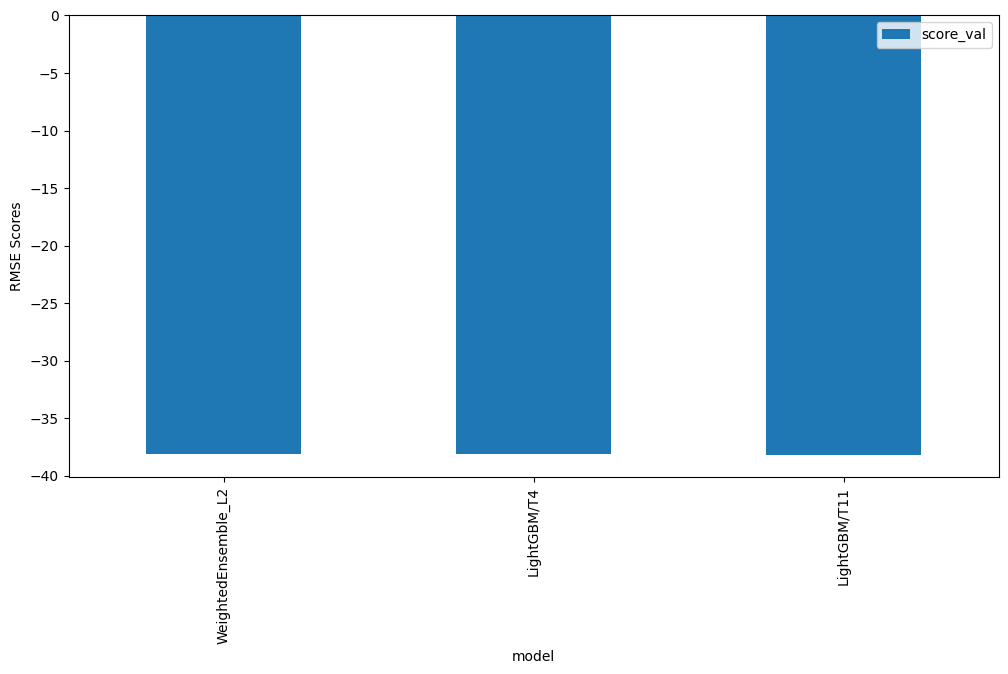

In [63]:
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [65]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    15.991182
1     3.156519
2     1.921339
3     1.381583
4     1.345440
Name: count, dtype: float32

In [66]:
predictions_new_hpo.describe()

count    6493.000000
mean      189.961609
std       174.346725
min       -26.475237
25%        46.449680
50%       147.861145
75%       283.093658
max       941.961060
Name: count, dtype: float64

In [67]:
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6390
Total negative prediction values : 103


In [68]:
predictions_new_hpo[predictions_new_hpo<0] = 0

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [69]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [70]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 466kB/s]
Successfully submitted to Bike Sharing Demand

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-08 15:40:57.133000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.54715      0.54715       
submission_new_features.csv  2025-06-08 15:31:37.713000  new features                       SubmissionStatus.COMPLETE  0.48747      0.48747       
submission.csv               2025-06-08 15:14:18.873000  first raw submission               SubmissionStatus.COMPLETE  1.83385      1.83385       
submission_new_hpo.csv       2025-06-07 20:01:07.510000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.84378      1.84378       


Submisson new hpo: 0.54715

In [73]:
#next hyperparameter optimization
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "optimize_for_deployment"

In [74]:
from autogluon.tabular import TabularPredictor

excluded_model_types = ['NN_TORCH']

# General settings
label = 'count'
ignored_columns = ['casual', 'registered']
time_limit = 600  # Maximum training time in seconds (10 minutes)
presets = 'optimize_for_deployment'

# Define full model configurations and hyperparameters (no shorthand strings)
hyperparameters = {
    'GBM': [
        {
            'extra_trees': True,
            'num_boost_round': 100,
            'num_leaves': 36,
            'ag_args': {'name_suffix': 'XT'}
        },
        {},
        {
            'learning_rate': 0.03,
            'num_leaves': 128,
            'feature_fraction': 0.9,
            'min_data_in_leaf': 3,
            'ag_args': {'name_suffix': 'Large', 'priority': 0}
        }
    ],
    'XT' : [
        {
            'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
        }
    ],
    'XGB' : [
        {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth' : 6,
            'n_estimators' : 100,
            'eta': 0.3,
            'subsample': 1,
            'colsample_bytree': 1
        }
    ]
    }


# Hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 20,
    'scheduler': 'local',
    'searcher': 'auto'
}

# Train the model
predictor_new_hpo1 = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)

# Show leaderboard
predictor_new_hpo1.leaderboard(silent=True)


No path specified. Models will be saved in: "AutogluonModels/ag-20250608_154206"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.32 GB / 12.67 GB (81.4%)
Disk Space Avail:   65.95 GB / 107.72 GB (61.2%)
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250608_154206"
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10566.34 MB
	Train Data (Original)  

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	1.08s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-66.9308	 = Validation score   (-root_mean_squared_error)
	2.14s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-57.0944	 = Validation score   (-root_mean_squared_error)
	2.41s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-97.6288	 = Validation score   (-root_mean_squared_error)
	1.58s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-120.7922	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-90.2306	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-59.7278	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	3.37s	 = Training   runtime
	0.37s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.67s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.94s	 = Training   runtime
	0.5s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	14.98s	 = Training   runtime
	2.96s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	3.04s	 = Training   runtime
	0.2s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	4.31s	 = Training   runtime
	0.64s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_e

  0%|          | 0/20 [00:00<?, ?it/s]

cannot access local variable 'eval_metric_name' where it is not associated with a value
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1051, in fit
    out = self._fit(**kwargs)
          ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/tabular/models/xgboost/xgboost_model.py", line 171, in _fit
    metric_name=eval_metric_name,  # forces stopping_metric rather than arbitrary last metric
                ^^^^^^^^^^^^^^^^
UnboundLocalError: cannot access local variable 'eval_metric_name' where it is not associated wi

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -37.797224  root_mean_squared_error       4.812285   
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.957790   
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.047027   
3        ExtraTreesMSE -39.584076  root_mean_squared_error       0.806645   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  32.005070                0.000823           0.016617            2   
1  14.982952                2.957790          14.982952            1   
2   6.972510                1.047027           6.972510            1   
3  10.032991                0.806645          10.032991            1   

   can_infer  fit_order  
0       True          4  
1       True          1  
2       True          2  
3       True          3

In [75]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.797224  root_mean_squared_error       4.812285  32.005070                0.000823           0.016617            2       True          4
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.957790  14.982952                2.957790          14.982952            1       True          1
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.047027   6.972510                1.047027           6.972510            1       True          2
3        ExtraTreesMSE -39.584076  root_mean_squared_error       0.806645  10.032991                0.806645          10.032991            1       True          3
Number of models trained: 4
Types of models trained:
{'XTModel', 'WeightedEnsembleModel', 'LGBModel'}
Bagging used: False 


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': np.float64(-38.12400606131232),
  'LightGBM/T11': np.float64(-38.22832821272466),
  'ExtraTreesMSE': np.float64(-39.584076050325685),
  'WeightedEnsemble_L2': np.float64(-37.79722414712717)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'ExtraTreesMSE': ['ExtraTreesMSE'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 14.982951879501343,
  'LightGBM/T11': 6.972509860992432,
  'ExtraTreesMSE': 10.032991409301758,
  'WeightedEnsemble_L2': 0.0166165828704834},
 'model_pred_times': {'LightGBM/T4': 2.957789897918701,
  'LightGBM/T11': 1.0470271110534668,
  'ExtraTreesMSE': 0.8066451549530029,
  'WeightedEnsemble_L2': 0.0008230209350585938},
 'num_bag_folds': 0,
 'max_stack_leve

In [76]:
leaderboard_new_hpo1_df = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
leaderboard_new_hpo1_df

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -37.797224  root_mean_squared_error       4.812285   
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.957790   
2         LightGBM/T11 -38.228328  root_mean_squared_error       1.047027   
3        ExtraTreesMSE -39.584076  root_mean_squared_error       0.806645   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  32.005070                0.000823           0.016617            2   
1  14.982952                2.957790          14.982952            1   
2   6.972510                1.047027           6.972510            1   
3  10.032991                0.806645          10.032991            1   

   can_infer  fit_order  
0       True          4  
1       True          1  
2       True          2  
3       True          3

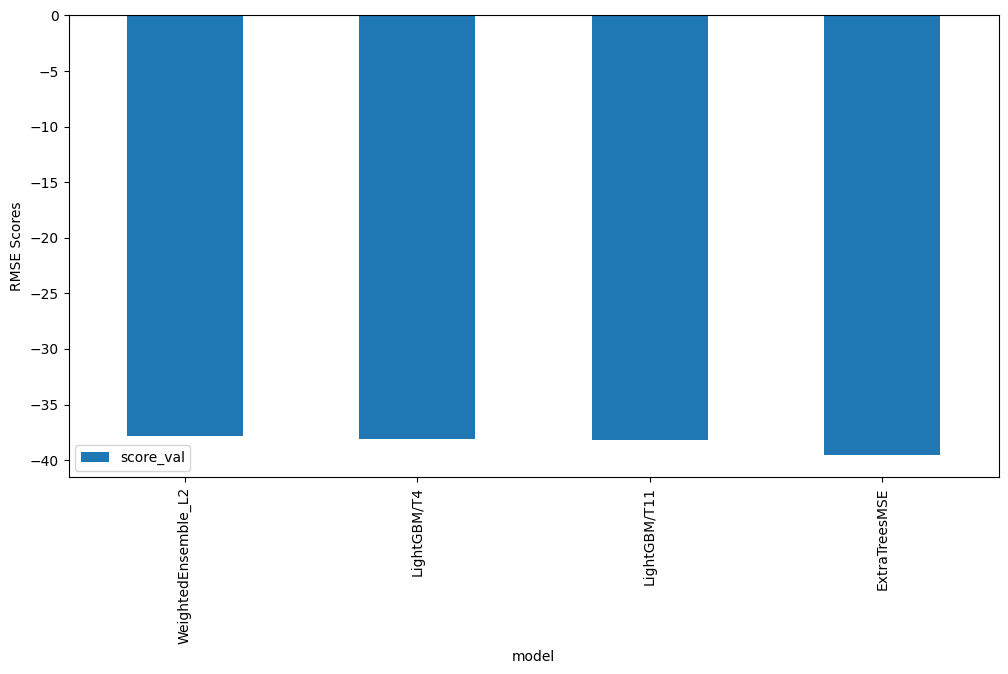

In [77]:
import matplotlib.pyplot as plt
leaderboard_new_hpo1_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()


In [81]:
# Load test data
test = pd.read_csv("test.csv")

# Preserve 'datetime' column before dropping or modifying
test['datetime'] = pd.to_datetime(test['datetime'])

# Reapply the feature engineering steps to the test DataFrame
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"
test["day_type"] = test["day_type"].astype("category")

# Drop the 'atemp' column as it was dropped from the training data
test.drop(["atemp"], axis=1, inplace=True)

In [82]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    15.125503
1     3.677229
2     2.225937
3     1.853711
4     1.859155
Name: count, dtype: float32

In [83]:
predictions_new_hpo1.describe()

count    6493.000000
mean      190.654572
std       173.066772
min       -18.786364
25%        47.846794
50%       149.706573
75%       283.952820
max       931.725342
Name: count, dtype: float64

In [84]:
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6430
Total negative prediction values : 63


In [85]:
predictions_new_hpo1[predictions_new_hpo1<0] = 0
# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No.of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No.of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [86]:
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [87]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

#### New Score of `?`

In [88]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 188k/188k [00:00<00:00, 542kB/s]
Successfully submitted to Bike Sharing Demand

In [89]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                          status                     publicScore  privateScore  
---------------------------  --------------------------  -----------------------------------  -------------------------  -----------  ------------  
submission_new_hpo1.csv      2025-06-08 15:51:20         new features with hyperparameters 1  SubmissionStatus.COMPLETE  0.51152      0.51152       
submission_new_hpo.csv       2025-06-08 15:40:57.133000  new features with hyperparameters    SubmissionStatus.COMPLETE  0.54715      0.54715       
submission_new_features.csv  2025-06-08 15:31:37.713000  new features                         SubmissionStatus.COMPLETE  0.48747      0.48747       
submission.csv               2025-06-08 15:14:18.873000  first raw submission                 SubmissionStatus.COMPLETE  1.83385      1.83385       


New score of: 0.51152

In [90]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train
time_limit = 600
presets = "optimize_for_deployment"

In [91]:
from autogluon.tabular import TabularPredictor

excluded_model_types = ['NN_TORCH']

# General settings
label = 'count'
ignored_columns = ['casual', 'registered']
time_limit = 600  # Maximum training time in seconds (10 minutes)
presets = 'optimize_for_deployment'

# Define full model configurations and hyperparameters (no shorthand strings)
hyperparameters = {
    'GBM': [
        {
            'extra_trees': True,
            'num_boost_round': 100,
            'num_leaves': 36,
            'ag_args': {'name_suffix': 'XT'}
        },
        {},
        {
            'learning_rate': 0.03,
            'num_leaves': 128,
            'feature_fraction': 0.9,
            'min_data_in_leaf': 3,
            'ag_args': {'name_suffix': 'Large', 'priority': 0}
        }
    ],
    'XT' : [
        {
            'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
        }
    ],
    'XGB' : [
        {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth' : 6,
            'n_estimators' : 100,
            'eta': 0.3,
            'subsample': 1,
            'colsample_bytree': 1
        }
    ],
    'RF' : [
        {
            'criterion': 'squared_error',
            'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
        }
    ],
    'KNN' : [
        {
            'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}},
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}
        }
    ]
    }


# Hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 20,
    'scheduler': 'local',
    'searcher': 'auto'
}

# Train the model
predictor_new_hpo2 = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)

# Show leaderboard
predictor_new_hpo2.leaderboard(silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_155830"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.14 GB / 12.67 GB (80.0%)
Disk Space Avail:   65.70 GB / 107.72 GB (61.0%)
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250608_155830"
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10379.13 MB
	Train Data (Original)  

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-66.9308	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-57.0944	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-97.6288	 = Validation score   (-root_mean_squared_error)
	0.68s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-120.7922	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-90.2306	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-59.7278	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Trai

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376


	Ran out of time, early stopping on iteration 1095. Best iteration is:
	[1093]	valid_set's rmse: 38.4972


[1000]	valid_set's rmse: 38.5283


	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.46s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.64s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.91s	 = Training   runtime
	0.47s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	14.25s	 = Training   runtime
	3.65s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	2.06s	 = Training   runtime
	0.2s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	4.35s	 = Training   runtime
	0.62s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_squared

  0%|          | 0/20 [00:00<?, ?it/s]

cannot access local variable 'eval_metric_name' where it is not associated with a value
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1051, in fit
    out = self._fit(**kwargs)
          ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/tabular/models/xgboost/xgboost_model.py", line 170, in _fit
    verbose=verbose,
            ^^^^^^^
UnboundLocalError: cannot access local variable 'eval_metric_name' where it is not associated with a value
cannot access local variable 'eval_metric_name' where it is not associated 

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -37.830584  root_mean_squared_error       4.439210   
1          LightGBM/T4 -38.124006  root_mean_squared_error       3.652311   
2        ExtraTreesMSE -39.584076  root_mean_squared_error       0.786103   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  24.416499                0.000796           0.024067            2   
1  14.247511                3.652311          14.247511            1   
2  10.144921                0.786103          10.144921            1   

   can_infer  fit_order  
0       True          3  
1       True          1  
2       True          2

In [92]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.830584  root_mean_squared_error       4.439210  24.416499                0.000796           0.024067            2       True          3
1          LightGBM/T4 -38.124006  root_mean_squared_error       3.652311  14.247511                3.652311          14.247511            1       True          1
2        ExtraTreesMSE -39.584076  root_mean_squared_error       0.786103  10.144921                0.786103          10.144921            1       True          2
Number of models trained: 3
Types of models trained:
{'XTModel', 'WeightedEnsembleModel', 'LGBModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 3 | ['season', 'weather', 'day_type']
('fl

{'model_types': {'LightGBM/T4': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': np.float64(-38.12400606131232),
  'ExtraTreesMSE': np.float64(-39.584076050325685),
  'WeightedEnsemble_L2': np.float64(-37.830583929702364)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'ExtraTreesMSE': ['ExtraTreesMSE'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 14.24751091003418,
  'ExtraTreesMSE': 10.144920587539673,
  'WeightedEnsemble_L2': 0.024067163467407227},
 'model_pred_times': {'LightGBM/T4': 3.652310848236084,
  'ExtraTreesMSE': 0.7861034870147705,
  'WeightedEnsemble_L2': 0.0007960796356201172},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T4': {'learning_rate': 0.006163502781172818,
   'feature_fraction': 0.824383651636118,
   'min_data_in_leaf': 14,
   'num_leaves': 74},
  'ExtraTreesMSE

In [93]:
# Leaderboard dataframe
leaderboard_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
leaderboard_new_hpo2_df

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -37.830584  root_mean_squared_error       4.439210   
1          LightGBM/T4 -38.124006  root_mean_squared_error       3.652311   
2        ExtraTreesMSE -39.584076  root_mean_squared_error       0.786103   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  24.416499                0.000796           0.024067            2   
1  14.247511                3.652311          14.247511            1   
2  10.144921                0.786103          10.144921            1   

   can_infer  fit_order  
0       True          3  
1       True          1  
2       True          2

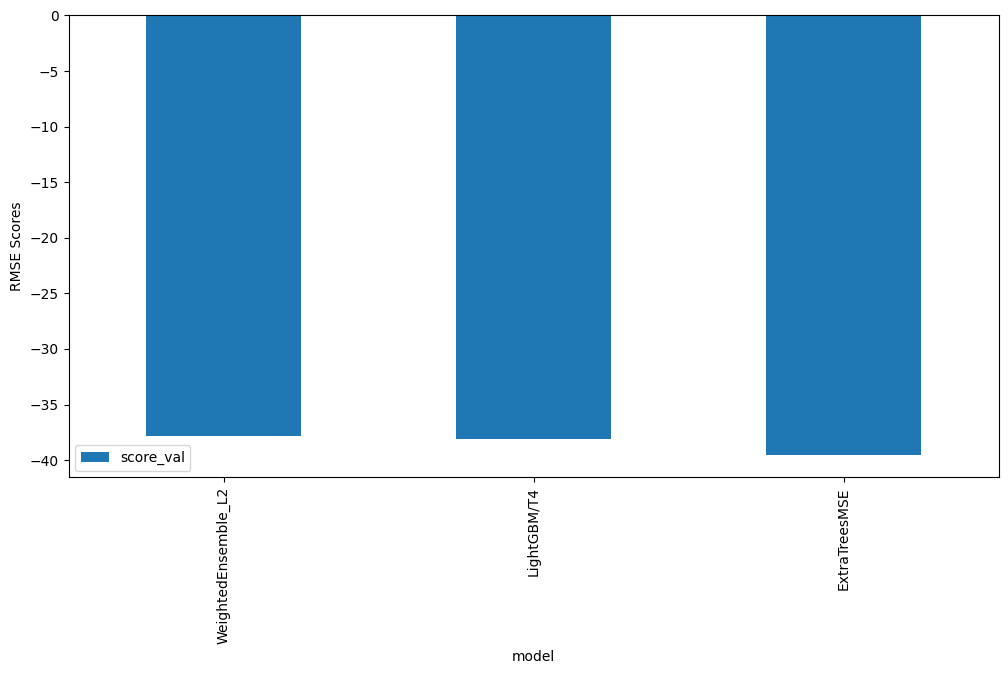

In [94]:
import matplotlib.pyplot as plt
leaderboard_new_hpo2_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [95]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    15.753335
1     4.521827
2     2.812655
3     2.335308
4     2.345185
Name: count, dtype: float32

In [96]:
predictions_new_hpo2.describe()

count    6493.000000
mean      190.590546
std       172.991562
min       -18.818817
25%        47.920155
50%       149.206650
75%       283.834961
max       929.900146
Name: count, dtype: float64

In [97]:
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo2.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6427
Total negative prediction values : 66


In [98]:
predictions_new_hpo2[predictions_new_hpo2<0] = 0

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [99]:
# Same thing as train and test dataset
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [100]:
# Same submitting predictions
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [103]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

100% 188k/188k [00:00<00:00, 503kB/s]
Successfully submitted to Bike Sharing Demand

In [104]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

fileName                     date                        description                          status                     publicScore  privateScore  
---------------------------  --------------------------  -----------------------------------  -------------------------  -----------  ------------  
submission_new_hpo2.csv      2025-06-08 16:04:36.527000  new features with hyperparameters 2  SubmissionStatus.COMPLETE  0.51464      0.51464       
submission_new_hpo1.csv      2025-06-08 15:51:20         new features with hyperparameters 1  SubmissionStatus.COMPLETE  0.51152      0.51152       
submission_new_hpo.csv       2025-06-08 15:40:57.133000  new features with hyperparameters    SubmissionStatus.COMPLETE  0.54715      0.54715       
submission_new_features.csv  2025-06-08 15:31:37.713000  new features                         SubmissionStatus.COMPLETE  0.48747      0.48747       
submission.csv               2025-06-08 15:14:18.873000  first raw submission                 SubmissionSt

New score of 0.51464       

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

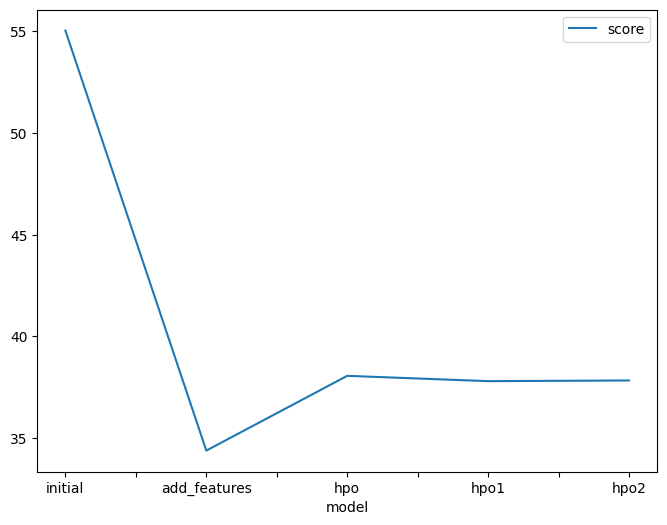

In [107]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "score": [55.036685 ,34.382987 ,38.058735 ,37.797224, 37.830584]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

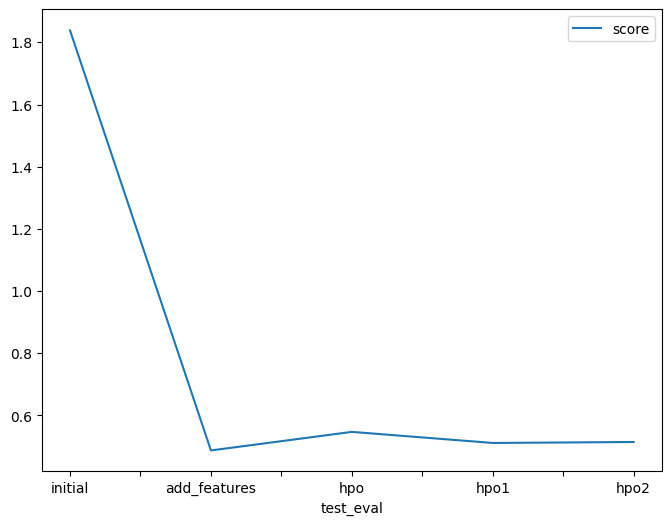

In [109]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "score": [1.83835, 0.48747, 0.54715, 0.51152, 0.51464]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [112]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.83835, 0.48747, 0.54715]
})

model                                    hpo1               hpo2  \
0       initial                       prescribed_values  prescribed_values   
1  add_features                       prescribed_values  prescribed_values   
2           hpo  Tree-Based Models: (GBM, XT, XGB & RF)                KNN   

                                        hpo3    score  
0  presets: 'high quality' (auto_stack=True)  1.83835  
1  presets: 'high quality' (auto_stack=True)  0.48747  
2          presets: 'optimize_for_deployment  0.54715

In [163]:
!pip install nbconvert

In [164]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
!find /content/drive/MyDrive/ -name "UdacityFinal.ipynb"

/content/drive/MyDrive/Colab Notebooks/UdacityFinal.ipynb


In [169]:
!jupyter nbconvert --to html --template classic "/content/drive/MyDrive/Colab Notebooks/UdacityFinal.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/UdacityFinal.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][25]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stderr',
 'output_type': 'stream',
 'text': 'No path specified. Models will be saved in: '
         '"AutogluonModels/ag-...'}
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    se